# Chapter: Time Series Analysis: Concepts and Applications

## Topic: Fit ARIMA model using ACF & PACF plots and ADF test

In [3]:
# import packages
import numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams.update({'font.size': 14})
np.random.seed(100)

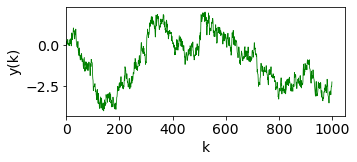

In [4]:
# read data
y = np.loadtxt('ARIMA_data.txt')

# plot
plt.figure(figsize=(5,2))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y(k)'), plt.xlabel('k'), plt.xlim(0)
plt.show()

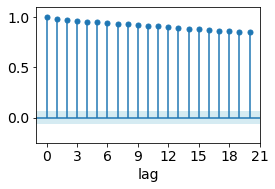

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


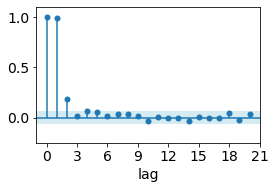

In [5]:
# generate ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.ticker import MaxNLocator
conf_int = 2/np.sqrt(len(y))

fig, ax = plt.subplots(1,1,figsize=(4,2.5))
plot_acf(y, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim(-0.25, 1.1)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(4,2.5))
plot_pacf(y, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim(-0.25, 1.1)
plt.show()

In [6]:
# perform augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('p-value: %f' % result[1])

p-value: 0.324628


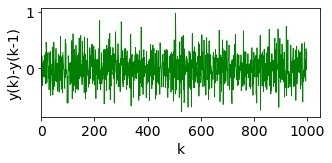

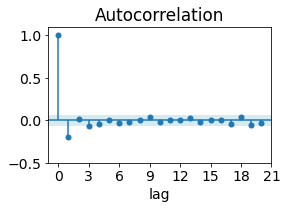

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


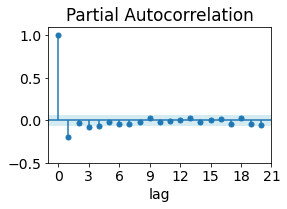

p-value: 0.000000


In [7]:
#%% check ACF/PACF/ADF test of 1-degree differenced signal
delta_y = np.diff(y, axis=0)

# plot
plt.figure(figsize=(5,2))
plt.plot(delta_y, 'g', linewidth=0.8)
plt.ylabel('y(k)-y(k-1)'), plt.xlabel('k'), plt.xlim(0)

# ACF
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
plot_acf(delta_y, lags= 20, alpha=None, ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim(-0.5, 1.1)
plt.show()

# PACF
fig, ax = plt.subplots(1,1,figsize=(4,2.5))
plot_pacf(delta_y, lags= 20, alpha=None, ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.ylim(-0.5, 1.1)
plt.show()

# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(delta_y)
print('p-value: %f' % result[1])

In [5]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Residual analysis
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [8]:
# fit ARIMA model
y_centered = y - np.mean(y)
model = ARIMA(y_centered, order=(1, 1, 1)) # order = (p,d,r)
results = model.fit()

# Print out summary information on the fit
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -76.013
Date:                Tue, 16 May 2023   AIC                            158.027
Time:                        23:16:22   BIC                            172.747
Sample:                             0   HQIC                           163.622
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4883      0.096      5.065      0.000       0.299       0.677
ma.L1         -0.6723      0.082     -8.159      0.000      -0.834      -0.511
sigma2         0.0682      0.003     23.341      0.0